<h1>Linear Algebra (CpE210A)

<h3>Midterms Project

Coded and submitted by:<br>
<i>Galarion, Adrian Q.<br>
    201814169 <br>
   CpE210A </i>
  

Directions
This Jupyter Notebook will serve as your base code for your Midterm Project. You must further format and provide complete discussion on the given topic. 
- Provide all necessary explanations for specific code blocks. 
- Provide illustrations for key results.
- Observe clean code (intuitive variable names, proper commenting, proper code spacing)
- Provide a summary discussion at the end

Failure to use this format or failure to update the document will be given a deduction equivalent to 50% of the original score. 

### Case

Bebang is back to consult you about her business. Furthering her data analytics initiative she asks you for help to compute some relevant data. Now she is asking you to compute and visualize her sales and costs for the past year. She has given you the datasets attached to her request.

### Problem

State and explain Bebang's problem here and provide the deliverables.

Bebang's problems is to compute and visualize her sales and costs for the past year. Reshape the price and cost data to a shape of (12,1). next is to compute the monthly revenue, monthly cost, and monthly profit using the given formulas. next is to compute the revenue, cost, and profit for each flavor then after that identify the top 3 best flavors and the top 3 worst flavors by sorting the yearly sales of each flavor.

# Proof of Concept

Now that you have a grasp on the requirements we need to start with making a program to prove that her problem is solvable. As a Linear Algebra student, we will be focusin on applying vector operations to meet her needs. First, we need to import her data. We will use the `pandas` library for this. For more information you can look into their documentation [here](https://pandas.pydata.org/).

In [191]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

In [192]:
df_prices = pd.read_csv(r'C:\Users\EYY._.giee\Downloads\bebang-prices.csv')
df_sales = pd.read_csv(r'C:\Users\EYY._.giee\Downloads\bebang-sales.csv')

In [193]:
df_sales 

,flavor,january,february,march,april,may,june,july,august,september,october,november,december
0,red velvet,781,524,364,157,894,56,89,41,23,78,231,899
1,oreo,210,324,344,32,123,1,3,0,1,6,312,548
2,sugar glazed,599,674,854,14,467,78,36,48,75,98,781,1602
3,almond honey,124,112,114,23,198,12,32,41,23,36,300,566
4,matcha,645,498,885,98,177,98,43,96,26,71,549,897
5,strawberry cream,210,372,369,78,163,26,45,22,54,41,207,456
6,brown sugar boba,981,380,154,14,147,15,98,33,23,36,552,633
7,furits and nuts,478,462,354,49,89,0,1,0,1,8,335,214
8,dark chocolate,598,203,36,96,789,4,5,0,8,0,789,458
9,chocolate and orange,324,123,48,32,65,74,78,45,89,100,632,231


In [194]:
df_prices

,Unnamed: 0,red velvet,oreo,sugar glazed,almond honey,matcha,strawberry cream,brown sugar boba,furits and nuts,dark chocolate,chocolate and orange,choco mint,choco butter naught
0,price per piece,35,25,20,35,50,40,40,45,30,40,45,45
1,cost per piece,25,15,10,20,35,31,30,25,15,25,32,31


## Part 1: Monthly Sales

In [195]:
sales_mat = np.array(df_sales.set_index('flavor'))
prices_mat = np.array(df_prices.set_index('Unnamed: 0'))[0] 
costs_mat = np.array(df_prices.set_index('Unnamed: 0'))[1]

price_reshaped=np.reshape(prices_mat,(12,1))
cost_reshaped=np.reshape(costs_mat,(12,1))

print(sales_mat.shape)
print(price_reshaped.shape)
print(cost_reshaped.shape)

(12, 12)
(12, 1)
(12, 1)


#### Formulas

Take note that the fomula for revenue is: <br>
$revenue = sales * price $ <br>
In this case, think that revenue, sales, and price are vectors instead of individual values <br>
The formula of cost per item sold is: <br>
$cost_{sold} = sales * cost$ <br>
The formula for profit is: <br>
$profit = revenue - cost_{sold}$ <br>
Solving for the monthly profit will be the sum of all profits made on that month.

In [196]:
def monthly_sales(price, cost, sales):
    monthly_revenue = np.multiply(prices_mat, sales_mat.sum(axis=0))
    monthly_costs = np.multiply((sales_mat.sum(axis= 0)), cost)
    monthly_profits = np.subtract(monthly_revenue, costs_mat*sales_mat.sum(axis=0))
    return monthly_revenue.flatten(), monthly_costs.flatten(), monthly_profits.flatten()

In [197]:
month_rev, month_cost, month_profit = monthly_sales(prices_mat, costs_mat, sales_mat)

print(f'Monthly Revenue- {month_rev} \n\n Monthly Costs- {month_cost} \n\n Monthly Profit- {month_profit}')

Monthly Revenue- [216510 116750  84900  26985 208850  17360  18760  19035  12090  22960
 260775 422010] 

 Monthly Costs- [154650  70050  42450  15420 146195  13454  14070  10575   6045  14350
 185440 290718] 

 Monthly Profit- [ 61860  46700  42450  11565  62655   3906   4690   8460   6045   8610
  75335 131292]


## Part 2: Flavor Sales

In [198]:
def flavor_sales(price, cost, sales):
    flavor_revenue = np.multiply(prices_mat, sales_mat.sum(axis=1))
    flavor_costs = np.multiply(sales_mat.sum(axis= 1), cost)
    flavor_profits = np.subtract(flavor_revenue, costs_mat*sales_mat.sum(axis=1))
    return flavor_profits.flatten()

In [181]:
flavor_profit = flavor_sales(prices_mat, costs_mat, sales_mat)

print('Flavor Profit-',flavor_profit, '\n----------------------------------'
'------------------------------------------------------\nFlavor Sales-', sales_mat.sum(axis =1))

Flavor Profit- [41370 19040 53260 23715 61245 18387 30660 39820 44790 27615 26156 91770] 
----------------------------------------------------------------------------------------
Flavor Sales- [4137 1904 5326 1581 4083 2043 3066 1991 2986 1841 2012 6555]


In [199]:
df_sales['Total']=[sales_mat.sum(axis=1)[0],sales_mat.sum(axis=1)[1],sales_mat.sum(axis=1)[2]
,sales_mat.sum(axis=1)[3],sales_mat.sum(axis=1)[4],sales_mat.sum(axis=1)[5],sales_mat.sum(axis=1)[6]
,sales_mat.sum(axis=1)[7],sales_mat.sum(axis=1)[9],sales_mat.sum(axis=1)[9],sales_mat.sum(axis=1)[10]
,sales_mat.sum(axis=1)[11]]

df_sales

,flavor,january,february,march,april,may,june,july,august,september,october,november,december,Total
0,red velvet,781,524,364,157,894,56,89,41,23,78,231,899,4137
1,oreo,210,324,344,32,123,1,3,0,1,6,312,548,1904
2,sugar glazed,599,674,854,14,467,78,36,48,75,98,781,1602,5326
3,almond honey,124,112,114,23,198,12,32,41,23,36,300,566,1581
4,matcha,645,498,885,98,177,98,43,96,26,71,549,897,4083
5,strawberry cream,210,372,369,78,163,26,45,22,54,41,207,456,2043
6,brown sugar boba,981,380,154,14,147,15,98,33,23,36,552,633,3066
7,furits and nuts,478,462,354,49,89,0,1,0,1,8,335,214,1991
8,dark chocolate,598,203,36,96,789,4,5,0,8,0,789,458,1841
9,chocolate and orange,324,123,48,32,65,74,78,45,89,100,632,231,1841


In [214]:
month_sales = sales_mat
month_sales ={'Months':['01|Jan.','02|Feb','03|March','04|April','05|May'
    ,'06|June','07|July','08|Aug.','09|Sept.','10|Oct.','11|Nov.','12|Dec']
    ,'sales':[df_sales.sum(axis=0)[1],df_sales.sum(axis=0)[2],df_sales.sum(axis=0)[3],
    df_sales.sum(axis=0)[4],df_sales.sum(axis=0)[5],df_sales.sum(axis=0)[6],
    df_sales.sum(axis=0)[7],df_sales.sum(axis=0)[8],df_sales.sum(axis=0)[9],
    df_sales.sum(axis=0)[10],df_sales.sum(axis=0)[11],df_sales.sum(axis=0)[12]]}

print(pd.DataFrame(data=month_sales))

      Months  sales
0    01|Jan.   6186
1     02|Feb   4670
2   03|March   4245
3   04|April    771
4     05|May   4177
5    06|June    434
6    07|July    469
7    08|Aug.    423
8   09|Sept.    403
9    10|Oct.    574
10   11|Nov.   5795
11    12|Dec   9378


In [201]:
sorted_flavor=sorted(df_sales.Total)


#best flavors
Three_best_flavors ={'Best 3 flavor':['Choco Butter Naught','sugar glazed','red velvet'],
             'Sales':[sorted_flavor[-1],sorted_flavor[-2],sorted_flavor[-3]]}

print(pd.DataFrame(data=Three_best_flavors))

         Best 3 flavor  Sales
0  Choco Butter Naught   6555
1         sugar glazed   5326
2           red velvet   4137


In [202]:
Three_worst_flavors={'worst 3 flavor':['dark chocolate','chocolate and orange','almond hnoey']
              ,'sales':[sorted_flavor[-10],sorted_flavor[-11],sorted_flavor[-12]]}

print(pd.DataFrame(data=Three_worst_flavors))

         worst 3 flavor  sales
0        dark chocolate   1841
1  chocolate and orange   1841
2          almond hnoey   1581


## Part 3: Visualizing the Data 


#### Entire Dataset

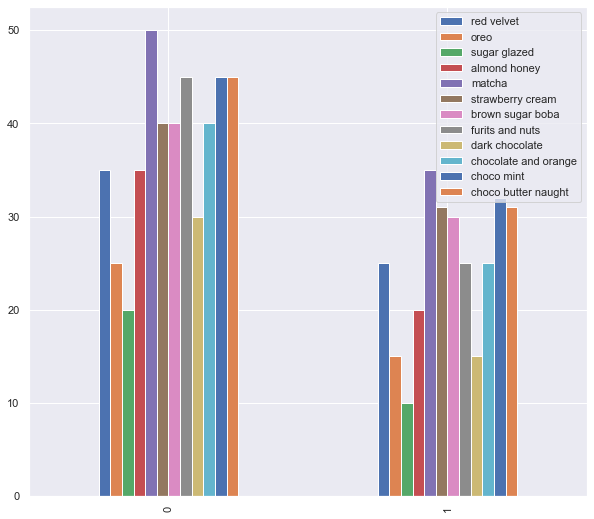

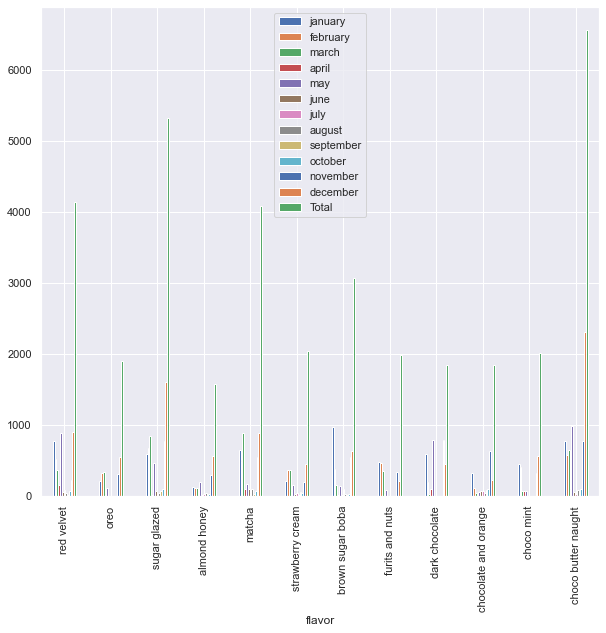

In [222]:
sns.set(rc={'figure.figsize':(10,9)})
df_prices.plot(kind='bar')
df_sales.plot(kind='bar',x='flavor')

#### Monthly Sales

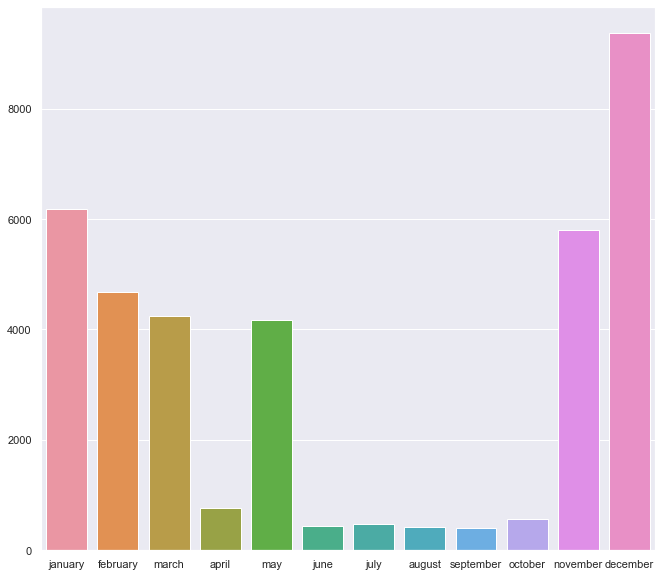

In [217]:
sns.set(rc={'figure.figsize':(11,10)})
sns.barplot("month","sales", data=monthly_sale)

#### Flavor Sales

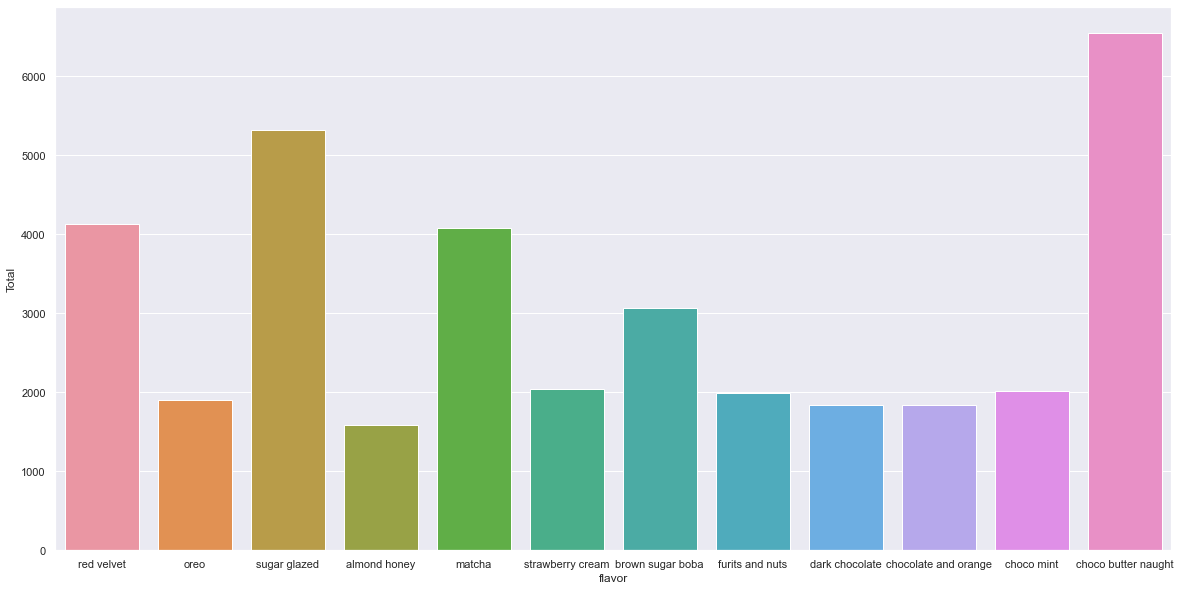

In [220]:
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot("flavor","Total",data=df_sales)

## Part 4: Business Recommendation and Conclusion


The programs recommendation for bebang's business is she needs to improve her sales in the month of april, june, july, august, september, and october because as you can see in the monthly sales graph this months are the lowest and needs to be improve. To improve bebang's sales she needs to reduce the number of products she sells on the month with low sales and bebang needs to think new idea's or new products to launch in this months with low sales like she need to create promos or discounts, and bebang needs to use the social media for more customers.The 3 worst flavors must be reduce or needs an improvement, the program also notice in the month of december has the highest sale and needs maintain.